In [1]:
from scipy.fft import fft, ifft, fftshift, fft2, ifft2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

%matplotlib inline 

# Noisy Signals

Just to get a sense of the power of the FFT, we look at the signal 

$$
s(t) = \cos(2t) + \sin(3t) + \epsilon(t),  \epsilon(t) \sim \mathcal{N}(0, 1).
$$

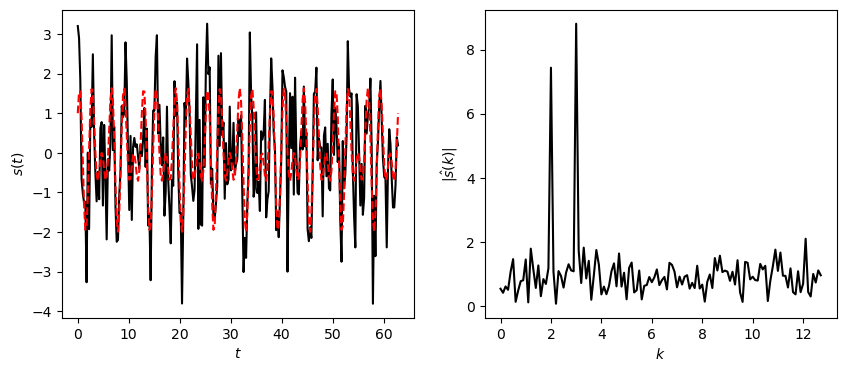

In [19]:
Npts = int(2**8)
times = np.linspace(0., 20.*np.pi, Npts)
rvals = np.random.randn(Npts)
sfun = lambda t: np.cos(2.*t) + np.sin(3.*t)
svals = sfun(times) + rvals
sfreq = fft(svals)
sfreq_plot = np.abs(fftshift(sfreq[:]))/np.sqrt(Npts)
kvals = np.arange(0, int(Npts/2)) * (2.*np.pi)/(20.*np.pi)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].plot(times, svals, 'k')
ax[0].plot(times, sfun(times), 'r--')
ax[0].set_xlabel(r"$t$")
ax[0].set_ylabel(r"$s(t)$")

ax[1].plot(kvals, sfreq_plot[int(Npts/2):], 'k')
ax[1].set_xlabel(r"$k$")
ax[1].set_ylabel(r"$|\hat{s}(k)|$");


So now, if we want to denoise, we use the same kind of threshholding to maximum arguments we used for the SVD.  This looks like:

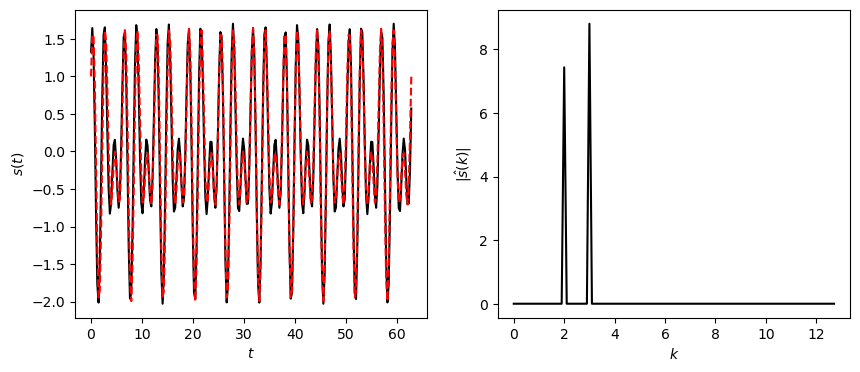

In [21]:
sfmax = np.max(np.abs(sfreq))
indskp = np.ma.log10(np.abs(sfreq)/sfmax) >= np.log10(.35)
sfilter = np.zeros(sfreq.size, dtype=np.complex128)
sfilter[indskp] = sfreq[indskp]
sfilter_plot = fftshift(np.abs(sfilter))/np.sqrt(Npts)
sdenoised = np.real(ifft(sfilter))

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].plot(times, sdenoised, 'k')
ax[0].plot(times, sfun(times), 'r--')
ax[0].set_xlabel(r"$t$")
ax[0].set_ylabel(r"$s(t)$")

ax[1].plot(kvals, sfilter_plot[int(Npts/2):], 'k')
ax[1].set_xlabel(r"$k$")
ax[1].set_ylabel(r"$|\hat{s}(k)|$");


# Image Analysis

In [36]:
# Find, load, and convert image from textbook data
textbook_image_files_path = '/Textbook Code and Data/DATA_PYTHON/DATA/'
dog_grayscale = io.imread('..' + textbook_image_files_path + 'dog.jpg', as_gray=True)

dog_freq = fft2(dog_grayscale)
dog_freq_plot = np.log10(fftshift(np.abs(dog_freq)))

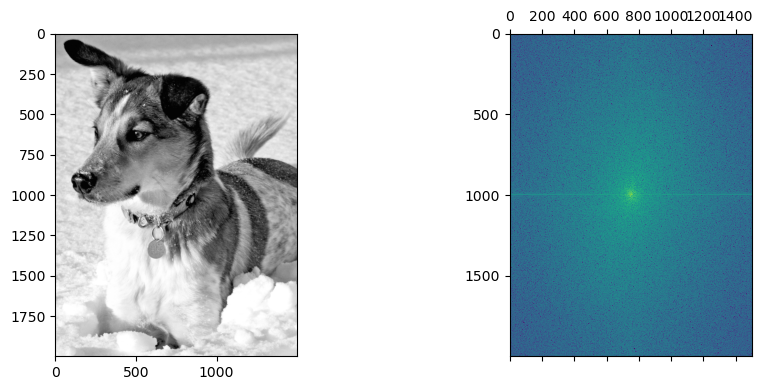

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()

ax[0].imshow(dog_grayscale, cmap=plt.cm.gray)
ax[1].matshow(dog_freq_plot)

plt.tight_layout()